## Modeling HT-SELEX data [Jolma et al. 2013]

In [1]:
import os
%load_ext autoreload
%autoreload 2

In [2]:
cd ~/workspace/theislab/mubind/notebooks/batch

[Errno 2] No such file or directory: '/home/ilibarra/workspace/theislab/mubind/notebooks/batch'
/mnt/c/Users/IgnacioIbarra/Dropbox/jupyter/lenovo


In [3]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../../annotations' # '../../annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import numpy as np

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [4]:
df = mb.bindome.datasets.ProBound.ctcf(flank_length=0)
df = df.sort_values(1, ascending=False).reset_index(drop=True)

# data = df.head(1000)
# data = df.copy()

df.index = df['seq']
del df['seq']
df.index = df.index.astype(str).str[45:]

df = df[~df.index.duplicated(keep='first')]

n_sample = 5000
if n_sample is not None:
    data = df.sample(min(df.shape[0], n_sample))
else:
    data = df.copy()

# data = mb.pp.sample_rounds(df, 2, 10000)

# remove as many nucleotides as posisble (faster training/convergence)


# data.index = data.index.astype(str).str[-15:]


In [5]:
data.shape

(5000, 2)

In [6]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [7]:
# TODO: skipped for now
n_rounds = 2

print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds, labels=[0, 1])
train = tdata.DataLoader(dataset=dataset,
                         # batch_size=256,
                         batch_size=625,
                         shuffle=False)

loading object (# entries) 5000


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# %lprun -f mb.tl.train_network mb.tl.train_network(model, train, device, next_optimiser, criterion, num_epochs=20, early_stopping=100, log_each=2, dirichlet_regularization=0, exp_max=40, verbose=0)

In [10]:
# %lprun -f mb.tl.train_iterative mb.tl.train_iterative(train, device, w=18, show_logo=False, opt_kernel_shift=0, opt_kernel_length=0, dirichlet_regularization=dirichlet_regularization, lr=[0.01, 0.01], weight_decay=[0.01, 0.001], ignore_kernel=ignore_kernel, num_epochs=2, early_stopping=100, use_dinuc=False, n_kernels=n_kernels, log_each=log_each, stop_at_kernel=None)

In [11]:
pd.set_option('display.expand_frame_repr', False)


In [12]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

dirichlet_regularization = 0
# for dirichlet_regularization_log in range(-5, 3):

n_epochs = 350
log_each = 50
n_kernels = 2
lr = [0.01] * n_kernels
kernels = [0, 2] + [20] * (n_kernels - 1)
wd = [0.01,] + [0.001] * (n_kernels - 1)
early_stopping = [5,] + [10] * (n_kernels)

opt_kernel_shift = [0, 0] + [1] * (n_kernels - 1)
opt_kernel_length = [0, 0] + [1] * (n_kernels - 1)
use_mono = True
use_dinuc = True
dinuc_mode = 'local'

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1

import time
t0 = time.time()

criterion = mb.tl.PoissonLoss()



False False False
Using device: cuda:0
current kernels
\Filter to optimize 0 (intercept)

FREEZING KERNELS
optimizing feature type mono
setting grad status of kernel (mono, dinuc) at 0 to (1, 0)
filters mask None
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 350 
early_stopping: 5
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


 15%|███████████████████████████▊                                                                                                                                                                   | 51/350 [00:15<01:17,  3.87it/s]

Epoch: 51, Loss: 0.852172, R2: 0.03,  best epoch: 49,  secs per epoch: 0.307 s,  secs epoch*1k trials: 0.061s curr time: 2024-04-08 14:04:42.619270


 29%|███████████████████████████████████████████████████████▎                                                                                                                                      | 102/350 [00:24<00:44,  5.62it/s]

Epoch: 101, Loss: 0.845348, R2: 0.03,  best epoch: 99,  secs per epoch: 0.245 s,  secs epoch*1k trials: 0.049s curr time: 2024-04-08 14:04:51.745778


 34%|█████████████████████████████████████████████████████████████████▏                                                                                                                            | 120/350 [00:28<00:55,  4.17it/s]

Epoch: 121, Loss: 0.845347, R2: 0.03,  best epoch: 115,  secs per epoch: 0.241s,  secs epoch*1k trials: 0.048s, curr time: 2024-04-08 14:04:56.177399
early stop!


Final loss: 0.8453474343 , R2: 0.03
Total time (model/function): (28.934s / 28.934s)
Time per epoch (model/function): (0.241s/ 0.241s)
Time per epoch per 1k trials: 0.048s
Current time: 2024-04-08 14:04:56.426226
optimization of dinuc is not necessary for the intercepts (filter=0). Skip...
current kernels
\Filter to optimize 1 

FREEZING KERNELS
optimizing feature type mono
setting grad status of kernel (mono, dinuc) at 1 to (1, 0)
filters mask None
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 350 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  6%|██████████▉                                                                                                                                                                                    | 20/350 [00:06<01:41,  3.24it/s]

Epoch: 21, Loss: 0.845289, R2: 0.03,  best epoch: 10,  secs per epoch: 0.312s,  secs epoch*1k trials: 0.062s, curr time: 2024-04-08 14:05:02.672051
early stop!
Final loss: 0.8452886343 , R2: 0.03
Total time (model/function): (35.179s / 6.245s)
Time per epoch (model/function): (1.759s/ 0.312s)
Time per epoch per 1k trials: 0.062s
Current time: 2024-04-08 14:05:02.819396


final refinement step (after shift)...

unfreezing all layers for final refinement
filters mask None
filters mask None
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 350 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0


use_tqdm True


  3%|██████                                                                                                                                                                                         | 11/350 [00:02<01:12,  4.65it/s]

Epoch: 12, Loss: 0.845285, R2: 0.03,  best epoch: 1,  secs per epoch: 0.221s,  secs epoch*1k trials: 0.044s, curr time: 2024-04-08 14:05:05.257030
early stop!
Final loss: 0.8452854231 , R2: 0.03
Total time (model/function): (37.617s / 2.438s)
Time per epoch (model/function): (3.420s/ 0.222s)
Time per epoch per 1k trials: 0.044s
Current time: 2024-04-08 14:05:05.383595
best loss 0.845243439078331


current r2 values by newly added filter
[0.03209163342300014]
optimizing feature type dinuc
setting grad status of kernel (mono, dinuc) at 1 to (0, 1)
filters mask None
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 350 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  3%|██████                                                                                                                                                                                         | 11/350 [00:02<01:06,  5.06it/s]


Epoch: 12, Loss: 0.845259, R2: 0.03,  best epoch: 1,  secs per epoch: 0.204s,  secs epoch*1k trials: 0.041s, curr time: 2024-04-08 14:05:07.786586
early stop!
Final loss: 0.8452588618 , R2: 0.03
Total time (model/function): (39.867s / 2.250s)
Time per epoch (model/function): (3.624s/ 0.205s)
Time per epoch per 1k trials: 0.041s
Current time: 2024-04-08 14:05:07.926090


final refinement step (after shift)...

unfreezing all layers for final refinement
filters mask None
filters mask None
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 350 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  3%|██████                                                                                                                                                                                         | 11/350 [00:02<01:02,  5.39it/s]

Epoch: 12, Loss: 0.845287, R2: 0.03,  best epoch: 1,  secs per epoch: 0.191s,  secs epoch*1k trials: 0.038s, curr time: 2024-04-08 14:05:10.026608
early stop!
Final loss: 0.8452873230 , R2: 0.03
Total time (model/function): (41.967s / 2.100s)
Time per epoch (model/function): (3.815s/ 0.191s)
Time per epoch per 1k trials: 0.038s
Current time: 2024-04-08 14:05:10.157949
best loss 0.8452255204319954


current r2 values by newly added filter
[0.03209163342300014, 0.03211011925849783]
current kernels
\Filter to optimize 2 

FREEZING KERNELS
optimizing feature type mono
setting grad status of kernel (mono, dinuc) at 2 to (1, 0)
filters mask None
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 350 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


 15%|████████████████████████████▍                                                                                                                                                                  | 52/350 [00:08<00:48,  6.14it/s]

Epoch: 51, Loss: 0.844320, R2: 0.04,  best epoch: 49,  secs per epoch: 0.163 s,  secs epoch*1k trials: 0.033s curr time: 2024-04-08 14:05:18.436535


 29%|███████████████████████████████████████████████████████▎                                                                                                                                      | 102/350 [00:17<00:53,  4.59it/s]

Epoch: 101, Loss: 0.844176, R2: 0.04,  best epoch: 99,  secs per epoch: 0.176 s,  secs epoch*1k trials: 0.035s curr time: 2024-04-08 14:05:27.851270


 43%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                                           | 152/350 [00:27<00:40,  4.83it/s]

Epoch: 151, Loss: 0.843289, R2: 0.04,  best epoch: 149,  secs per epoch: 0.184 s,  secs epoch*1k trials: 0.037s curr time: 2024-04-08 14:05:37.879015


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 201/350 [00:40<00:36,  4.11it/s]

Epoch: 201, Loss: 0.830506, R2: 0.09,  best epoch: 199,  secs per epoch: 0.205 s,  secs epoch*1k trials: 0.041s curr time: 2024-04-08 14:05:51.190933


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 251/350 [00:50<00:21,  4.68it/s]

Epoch: 251, Loss: 0.830415, R2: 0.09,  best epoch: 249,  secs per epoch: 0.202 s,  secs epoch*1k trials: 0.040s curr time: 2024-04-08 14:06:00.836955


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 301/350 [00:57<00:09,  5.05it/s]

Epoch: 301, Loss: 0.830404, R2: 0.09,  best epoch: 299,  secs per epoch: 0.193 s,  secs epoch*1k trials: 0.039s curr time: 2024-04-08 14:06:08.325949


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [01:06<00:00,  5.28it/s]


Final loss: 0.8303991184 , R2: 0.09
Total time (model/function): (108.305s / 66.338s)
Time per epoch (model/function): (0.310s/ 0.190s)
Time per epoch per 1k trials: 0.038s
Current time: 2024-04-08 14:06:16.707336

WIDTH OPTIMIZATION (first)...
Reached maximum w. Stop...

SHIFT OPTIMIZATION (first)...
options to try [[0, 0, -2], [0, 0, -1], [0, 0, 0], [0, 0, 1], [0, 0, 2]]
next expand left: 0, next expand right: 0, shift: -2
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1050 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  2%|████▌                                                                                                                                                                                         | 25/1050 [00:03<02:28,  6.91it/s]

Epoch: 26, Loss: 0.830564, R2: 0.09,  best epoch: 15,  secs per epoch: 0.146s,  secs epoch*1k trials: 0.029s, curr time: 2024-04-08 14:06:20.377445
early stop!
Final loss: 0.8305636495 , R2: 0.09
Total time (model/function): (111.968s / 3.662s)
Time per epoch (model/function): (4.479s/ 0.146s)
Time per epoch per 1k trials: 0.029s
Current time: 2024-04-08 14:06:20.463020

next expand left: 0, next expand right: 0, shift: -1
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1050 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0


use_tqdm True


  2%|███▊                                                                                                                                                                                          | 21/1050 [00:04<03:39,  4.69it/s]

Epoch: 22, Loss: 0.830667, R2: 0.09,  best epoch: 11,  secs per epoch: 0.216s,  secs epoch*1k trials: 0.043s, curr time: 2024-04-08 14:06:25.097656
early stop!
Final loss: 0.8306671083 , R2: 0.09
Total time (model/function): (112.838s / 4.533s)
Time per epoch (model/function): (5.373s/ 0.216s)
Time per epoch per 1k trials: 0.043s
Current time: 2024-04-08 14:06:25.294039



next expand left: 0, next expand right: 0, shift: 0
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1050 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  1%|██▏                                                                                                                                                                                           | 12/1050 [00:02<03:28,  4.97it/s]

Epoch: 13, Loss: 0.830392, R2: 0.09,  best epoch: 2,  secs per epoch: 0.208s,  secs epoch*1k trials: 0.042s, curr time: 2024-04-08 14:06:28.045063
early stop!
Final loss: 0.8303918689 , R2: 0.09
Total time (model/function): (110.802s / 2.497s)
Time per epoch (model/function): (9.234s/ 0.208s)
Time per epoch per 1k trials: 0.042s
Current time: 2024-04-08 14:06:28.178113



next expand left: 0, next expand right: 0, shift: 1
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1050 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  4%|███████▊                                                                                                                                                                                      | 43/1050 [00:07<02:49,  5.96it/s]

Epoch: 44, Loss: 0.830741, R2: 0.09,  best epoch: 33,  secs per epoch: 0.170s,  secs epoch*1k trials: 0.034s, curr time: 2024-04-08 14:06:35.663859
early stop!
Final loss: 0.8307405710 , R2: 0.09
Total time (model/function): (115.615s / 7.310s)
Time per epoch (model/function): (2.689s/ 0.170s)
Time per epoch per 1k trials: 0.034s
Current time: 2024-04-08 14:06:35.786111



next expand left: 0, next expand right: 0, shift: 2
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1050 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  8%|██████████████▍                                                                                                                                                                               | 80/1050 [00:13<02:44,  5.91it/s]

Epoch: 81, Loss: 0.831493, R2: 0.08,  best epoch: 70,  secs per epoch: 0.170s,  secs epoch*1k trials: 0.034s, curr time: 2024-04-08 14:06:49.479139
early stop!
Final loss: 0.8314930573 , R2: 0.08
Total time (model/function): (121.884s / 13.578s)
Time per epoch (model/function): (1.524s/ 0.170s)
Time per epoch per 1k trials: 0.034s
Current time: 2024-04-08 14:06:49.675845



sorted
   expand.left  expand.right  shift  pos_w_sum  width  loss_diff_pct      loss        r2  last_loss
5            0             0      0  12.508019     20       0.006758  0.830343  0.087481   0.830399
4            0             0      0  12.114492     20       0.000000  0.830399  0.087276   0.830399
3            0             0     -2  12.419438     20      -0.019653  0.830562  0.086706   0.830399
2            0             0     -1  12.338287     20      -0.031253  0.830659  0.086546   0.830399
1            0             0      1  12.500995     20      -0.041081  0.830740  0.086339   0.830399
0            0             0      2  12.114492     20      -0.131730  0.831493  0.084459   0.830399
0 0 0 12.50801944732666 20 0.006757927822298225 0.8303430005908012 0.08748069758526167
action (expand left, expand right, shift): (0, 0, 0)

This was the last iteration. Done with filter shift optimization...


final refinement step (after shift)...

unfreezing all layers for final refinement

  3%|██████▌                                                                                                                                                                                        | 12/350 [00:02<01:03,  5.32it/s]

Epoch: 13, Loss: 0.830310, R2: 0.09,  best epoch: 2,  secs per epoch: 0.193s,  secs epoch*1k trials: 0.039s, curr time: 2024-04-08 14:06:52.357258
early stop!
Final loss: 0.8303100392 , R2: 0.09
Total time (model/function): (113.116s / 2.314s)
Time per epoch (model/function): (9.426s/ 0.193s)
Time per epoch per 1k trials: 0.039s
Current time: 2024-04-08 14:06:52.461423
best loss 0.8300890550017357


current r2 values by newly added filter
[0.03209163342300014, 0.03211011925849783, 0.08830782628492584]
optimizing feature type dinuc
setting grad status of kernel (mono, dinuc) at 2 to (0, 1)
filters mask None
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 350 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  4%|███████                                                                                                                                                                                        | 13/350 [00:03<01:21,  4.12it/s]

Epoch: 14, Loss: 0.830143, R2: 0.09,  best epoch: 3,  secs per epoch: 0.247s,  secs epoch*1k trials: 0.049s, curr time: 2024-04-08 14:06:55.779629
early stop!
Final loss: 0.8301425353 , R2: 0.09
Total time (model/function): (116.323s / 3.207s)
Time per epoch (model/function): (8.948s/ 0.247s)
Time per epoch per 1k trials: 0.049s
Current time: 2024-04-08 14:06:55.928572

WIDTH OPTIMIZATION (first)...
Reached maximum w. Stop...

SHIFT OPTIMIZATION (first)...
options to try [[0, 0, -2], [0, 0, -1], [0, 0, 0], [0, 0, 1], [0, 0, 2]]
next expand left: 0, next expand right: 0, shift: -2
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1050 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0


use_tqdm True


  1%|██▎                                                                                                                                                                                           | 13/1050 [00:02<03:47,  4.57it/s]

Epoch: 14, Loss: 0.830654, R2: 0.09,  best epoch: 3,  secs per epoch: 0.223s,  secs epoch*1k trials: 0.045s, curr time: 2024-04-08 14:06:58.836539
early stop!
Final loss: 0.8306543604 , R2: 0.09
Total time (model/function): (119.221s / 2.898s)
Time per epoch (model/function): (9.171s/ 0.223s)
Time per epoch per 1k trials: 0.045s
Current time: 2024-04-08 14:06:58.939154

next expand left: 0, next expand right: 0, shift: -1
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1050 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0


use_tqdm True


  1%|██▎                                                                                                                                                                                           | 13/1050 [00:03<04:00,  4.31it/s]

Epoch: 14, Loss: 0.830543, R2: 0.09,  best epoch: 3,  secs per epoch: 0.236s,  secs epoch*1k trials: 0.047s, curr time: 2024-04-08 14:07:02.106001
early stop!


Final loss: 0.8305433244 , R2: 0.09
Total time (model/function): (119.395s / 3.072s)
Time per epoch (model/function): (9.184s/ 0.236s)
Time per epoch per 1k trials: 0.047s
Current time: 2024-04-08 14:07:02.347570

next expand left: 0, next expand right: 0, shift: 0
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1050 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  1%|██▎                                                                                                                                                                                           | 13/1050 [00:02<03:38,  4.75it/s]

Epoch: 14, Loss: 0.830144, R2: 0.09,  best epoch: 3,  secs per epoch: 0.216s,  secs epoch*1k trials: 0.043s, curr time: 2024-04-08 14:07:05.292910
early stop!
Final loss: 0.8301439881 , R2: 0.09
Total time (model/function): (119.127s / 2.805s)
Time per epoch (model/function): (9.164s/ 0.216s)
Time per epoch per 1k trials: 0.043s
Current time: 2024-04-08 14:07:05.430098



next expand left: 0, next expand right: 0, shift: 1
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1050 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  1%|██▎                                                                                                                                                                                           | 13/1050 [00:02<03:44,  4.61it/s]

Epoch: 14, Loss: 0.830664, R2: 0.09,  best epoch: 3,  secs per epoch: 0.222s,  secs epoch*1k trials: 0.044s, curr time: 2024-04-08 14:07:08.459850
early stop!


Final loss: 0.8306639716 , R2: 0.09
Total time (model/function): (119.211s / 2.888s)
Time per epoch (model/function): (9.170s/ 0.222s)
Time per epoch per 1k trials: 0.044s
Current time: 2024-04-08 14:07:08.717872

next expand left: 0, next expand right: 0, shift: 2
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1050 
early_stopping: 10
lr= 0.01, weight_decay= 0.001, dir weight= 0
use_tqdm True


  1%|██▎                                                                                                                                                                                           | 13/1050 [00:04<05:44,  3.01it/s]

Epoch: 14, Loss: 0.831719, R2: 0.08,  best epoch: 3,  secs per epoch: 0.344s,  secs epoch*1k trials: 0.069s, curr time: 2024-04-08 14:07:13.483082
early stop!
Final loss: 0.8317187950 , R2: 0.08
Total time (model/function): (120.798s / 4.475s)
Time per epoch (model/function): (9.292s/ 0.344s)
Time per epoch per 1k trials: 0.069s
Current time: 2024-04-08 14:07:13.641697



sorted
   expand.left  expand.right  shift  pos_w_sum  width  loss_diff_pct      loss        r2  last_loss
4            0             0      0  11.614958     20       0.000000  0.830098  0.088519   0.830098
5            0             0      0  12.546581     20      -0.000628  0.830103  0.088733   0.830098
3            0             0     -1  12.165119     20      -0.047070  0.830488  0.087175   0.830098
1            0             0     -2  11.969519     20      -0.059050  0.830588  0.086701   0.830098
2            0             0      1  12.192257     20      -0.062430  0.830616  0.086849   0.830098
0            0             0      2  11.614958     20      -0.189926  0.831674  0.083847   0.830098
0 0 0 11.614957809448242 20 0.0 0.8300976380705833 0.08851879535135887
action (expand left, expand right, shift): (0, 0, 0)

This was the last iteration. Done with filter shift optimization...


final refinement step (after shift)...

unfreezing all layers for final refinement
filters mask No

  3%|██████▌                                                                                                                                                                                        | 12/350 [00:04<02:11,  2.57it/s]

Epoch: 13, Loss: 0.830316, R2: 0.09,  best epoch: 2,  secs per epoch: 0.399s,  secs epoch*1k trials: 0.080s, curr time: 2024-04-08 14:07:18.849774
early stop!
Final loss: 0.8303160667 , R2: 0.09
Total time (model/function): (121.116s / 4.793s)
Time per epoch (model/function): (10.093s/ 0.399s)
Time per epoch per 1k trials: 0.080s
Current time: 2024-04-08 14:07:19.053412


best loss 0.8302411362528801
current r2 values by newly added filter
[0.03209163342300014, 0.03211011925849783, 0.08830782628492584, 0.0880228488718483]

optimization finished:
total time: 121.11609530448914s
Time per epoch (total): 0.346 s
##DONE....


True
3
order None
0 out of 3...


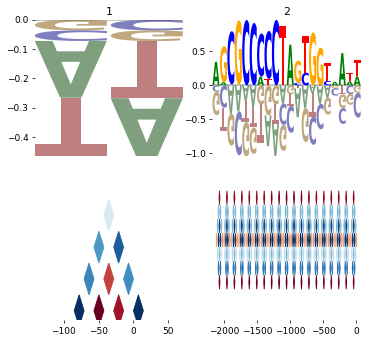

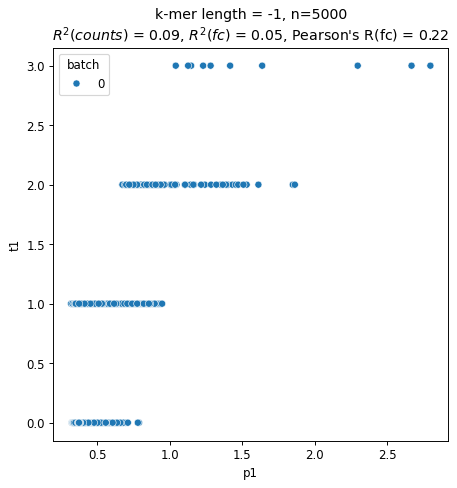

In [13]:
import itertools

models = []
for optimize_exp_barrier, optimize_kernel_rel, optimize_sym_weight in list(itertools.product([False, True], repeat=3)):
    print(optimize_exp_barrier, optimize_kernel_rel, optimize_sym_weight)
    model = mb.models.Mubind.make_model(train, n_kernels, criterion, kernels=kernels,
                                           use_dinuc=use_dinuc, dinuc_mode=dinuc_mode,
                                           optimize_exp_barrier= optimize_exp_barrier,
                                           optimize_kernel_rel = optimize_kernel_rel,
                                           optimize_sym_weight = optimize_sym_weight).cuda()

    model, best_loss = model.optimize_iterative(train,
                                                show_logo=0,
                                                r2_per_epoch=True,
                                                opt_kernel_length=opt_kernel_length,
                                                opt_kernel_shift=opt_kernel_shift,
                                                dirichlet_regularization=dirichlet_regularization, # 10 ** dirichlet_regularization_log,
                                                # lr=lr, weight_decay=wd, ignore_kernel=ignore_kernel,
                                                # skip_kernels={2, 3},
                                                n_epochs=n_epochs,
                                                early_stopping=early_stopping, # optimiser=torch.optim.LBFGS,
                                                log_each=log_each,
                                                stop_at_kernel=None) #  seed=seed) # seeds.index[0]) #
    print('##DONE....\n\n')
    # print('total time: %.3f s' % ((time.time() - t0)))
    # # res = []
    # # model_by_k = {}
    #
    # counts = mb.tl.predict(model, train)
    # print(counts)
    #
    mb.pl.set_rcParams({'figure.figsize': [10, 6], 'figure.dpi': 65})
    mb.pl.logo(model)
    #
    # mb.tl.scores(model, train, by='batch')
    mb.pl.set_rcParams({'figure.figsize': [6, 6], 'figure.dpi': 85})
    mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t1', xlab='p1')
    # mb.pl.activities(model)
    #
    # mb.pl.set_rcParams({'figure.figsize': [8, 4], 'figure.dpi': 85})
    # mb.pl.loss(model)

    models.append([model, best_loss])
    break

    # break


In [14]:
for m, best_loss in models:
    print(m.optimize_exp_barrier, m.optimize_kernel_rel, m.optimize_sym_weight, m.r2_final, m.total_time)


False False False 0.08751114300310736 121.11609530448914


True
3
order None
0 out of 3...


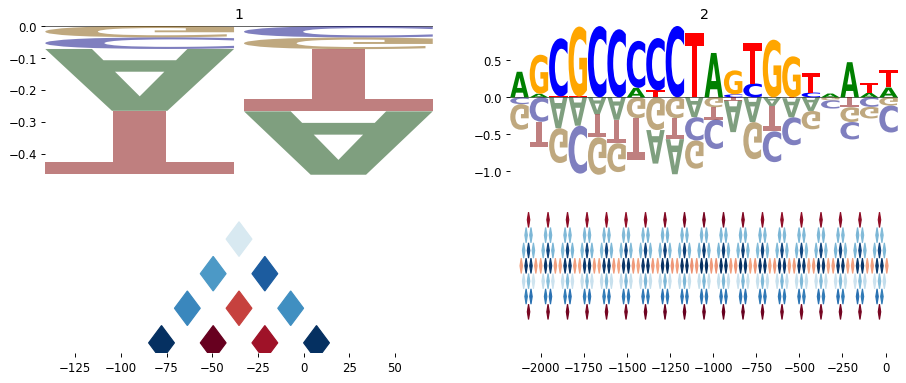

In [15]:
rcParams['figure.figsize'] = 20, 5
for m, best_loss in models:
    #print(m.optimize_exp_barrier, m.optimize_kernel_rel, m.optimize_sym_weight, m.r2_final, m.total_time)
    mb.pl.logo(m)


In [16]:
model

Mubind(
  (padding): ConstantPad2d(padding=(19, 19, 0, 0), value=0.25)
  (binding_modes): BindingModesSimple(
    (conv_mono): ModuleList(
      (0): None
      (1): Conv2d(1, 1, kernel_size=(4, 2), stride=(1, 1), bias=False)
      (2): Conv2d(1, 1, kernel_size=(4, 20), stride=(1, 1), bias=False)
    )
    (conv_di): ModuleList(
      (0): None
      (1): Conv2d(1, 1, kernel_size=(16, 1), stride=(1, 1), bias=False)
      (2): Conv2d(1, 1, kernel_size=(16, 19), stride=(1, 1), bias=False)
    )
  )
  (activities): ActivitiesLayer(
    (log_activities): ParameterList(
        (0): Parameter containing: [torch.float32 of size 1x2 (cuda:0)]
        (1): Parameter containing: [torch.float32 of size 1x2 (cuda:0)]
        (2): Parameter containing: [torch.float32 of size 1x2 (cuda:0)]
    )
  )
  (graph_module): GraphModule()
  (criterion): PoissonLoss()
)

<Axes: xlabel='index', ylabel='r2'>

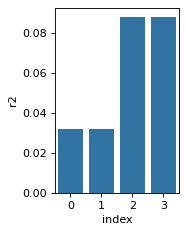

In [17]:
# contributions per newly added kernel
rcParams['figure.figsize'] = 2, 3
rcParams['figure.dpi'] = 80
import seaborn as sns
r2 = pd.DataFrame(model.best_r2_by_new_filter, columns=['r2']).reset_index()
sns.barplot(data=r2, x='index', y='r2')


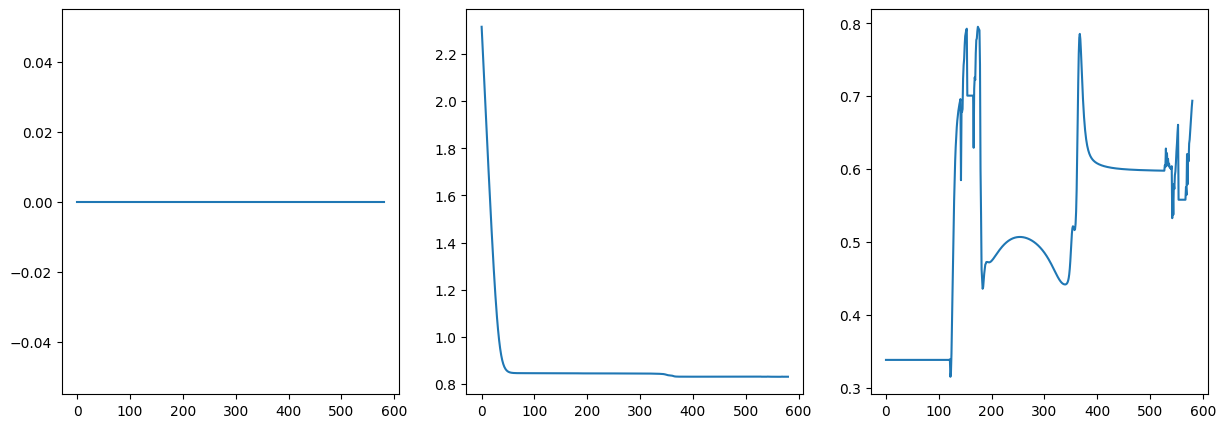

In [18]:
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 20, 5
rcParams['figure.dpi'] = 100

plt.subplot(1, 4, 1)
plt.plot(model.loss_history_log_dynamic)
plt.subplot(1, 4, 2)
plt.plot(model.loss_history)
plt.subplot(1, 4, 3)
plt.plot(model.loss_history_sym_weights)


In [19]:
model.get_log_activities()

tensor([[[-1.3876e-04, -3.5613e-02],
         [ 2.4015e-04, -1.5572e+00],
         [-7.2563e-04, -1.0359e+00]]], device='cuda:0',
       grad_fn=<StackBackward0>)

In [20]:
model.binding_modes

BindingModesSimple(
  (conv_mono): ModuleList(
    (0): None
    (1): Conv2d(1, 1, kernel_size=(4, 2), stride=(1, 1), bias=False)
    (2): Conv2d(1, 1, kernel_size=(4, 20), stride=(1, 1), bias=False)
  )
  (conv_di): ModuleList(
    (0): None
    (1): Conv2d(1, 1, kernel_size=(16, 1), stride=(1, 1), bias=False)
    (2): Conv2d(1, 1, kernel_size=(16, 19), stride=(1, 1), bias=False)
  )
)

0


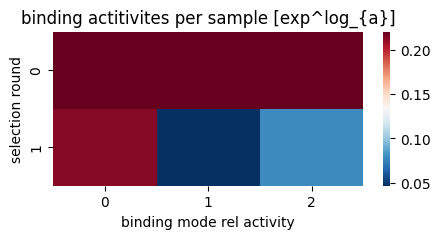

In [21]:
rcParams['figure.figsize'] = 5, 2
mb.pl.activities(model, cmap='RdBu_r')

In [22]:
import anndata
adata = anndata.AnnData(data.T)


In [23]:
import scanpy as sc

In [24]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


ValueError: n_components=50 must be between 1 and min(n_samples, n_features)=2 with svd_solver='arpack'

In [ ]:
adata

AnnData object with n_obs × n_vars = 5000 × 2
    uns: 'neighbors'
    obsp: 'distances', 'connectivities'

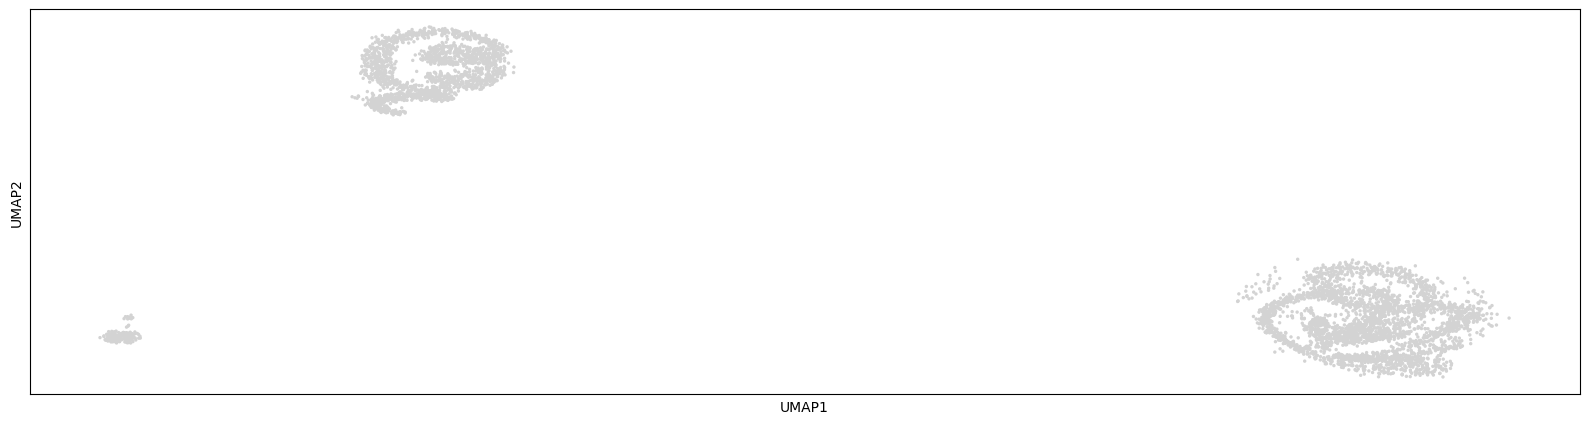

In [ ]:
sc.pl.umap(adata)